In [151]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer,load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_validate

from warnings import filterwarnings
filterwarnings('ignore')

## 앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등

#### 보팅: 
- 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식

#### 배깅
- bagging은 bootstrap aggregating의 줄임말
- bootstrap:모집단의 성질에 대해 표본을 통해 추정할 수 있는 것처럼, 표본의 성질에 대해서도 재표집(resampling)을 통해 추정할 수 있다는 것이다. 즉 주어진 표본(샘플)에 대해서, 그 샘플에서 또 다시 샘플(재표본)을 여러번(1,000~10,000번, 혹은 그 이상)추출하여 표본의 평균이나 분산 등이 어떤 분포를 가지는가를 알아낼 수 있다.(위키피디아)
- 같은 알고리즘에 대해 데이터 샘플을 다르게 두고 학습을 수행해 보팅을 수행하는 방식
- 이 때의 데이터 샘플은 중첩이 허용된다. 즉 10000개의 데이터에 대해 10개의 알고리즘이 배깅을 사용할 때,각 1000개의 데이터 내에는 중복된 데이터가 존재할 수 있다. 배깅의 대표적인 방식이 Random Forest
- decision tree로 배깅을한것이 Random Froest

#### 부스팅:
- 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 그 다음번 알고리즘에 가중치를 부여하여 (Ada)학습과 예측을 진행하는 방식
- 잔여오차를 다시학습(gradient)


( 부스팅 알고리즘은 대표적으로 아래와 같은 알고리즘들이 있음)
- AdaBoost
- Gradient Booting Machine(GBM)
- XGBoost
- LightGBM
- CatBoost


Hard Vote

classification을 예로 들어 보자면, 분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종 값으로 예측을 하게 됩니다.

Soft Vote

soft vote 방식은 각각의 확률의 평균 값을 계산한다음에 가장 확률이 높은 값으로 확정짓게 됩니다.

가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면, 

class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44, class 1이 나올 최종 확률은 

(0.6+0.1+0.1+0.6+0.6) / 5 = 0.4 가 되기 때문에 

앞선 Hard Vote의 결과와는 다른 결과 값이 최종 으로 선출되게 됩니다.

# Voting

In [6]:
bcancer = load_breast_cancer()

In [9]:
x_data = bcancer['data']
y_data = bcancer.target

In [10]:
x_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
model_logi = LogisticRegression()
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()
model_vote1 = VotingClassifier(estimators = [('LogisticRegression',model_logi),
                               ('KNeighborsClassifier',model_knn),
                               ('DecisionTreeClassifier',model_tree)],
                 voting = 'hard'
                )
# model_vote.fit(x_train, y_train)
cross_val = cross_validate(model_vote, x_train, y_train, cv =5)
print(cross_val)
model_vote1.fit( x_train, y_train)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(bcancer['data'],
                                                    bcancer['target'],
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify = bcancer['target']
                                                   )

In [17]:
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(algorithm='auto',...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
        

In [18]:
model_logi.predict( x_test )

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1])

In [21]:
model_logi.fit(x_train, y_train)
model_logi.predict( x_test )

numpy.ndarray

In [24]:
model_vote.score( x_test, y_test)

0.9649122807017544

In [25]:
model_logi.score(x_test, y_test)

0.956140350877193

In [34]:
for c in [model_logi, model_knn , model_tree]:
    c.fit(x_train, y_train)
    # 보팅 모델명을 출력하기위한 방법
    print(c.__class__.__name__,c.score(x_test,y_test))

LogisticRegression 0.956140350877193
KNeighborsClassifier 0.956140350877193
DecisionTreeClassifier 0.9649122807017544


In [35]:
from sklearn.datasets import load_wine

In [ ]:
# 3개의 분류 클래스를 이용하여 softvoting으로 정확도를 구하시요

In [36]:
wine = load_wine()

In [40]:
x_data = wine.data
y_data = wine.target

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(wine['data'],
                                                    wine['target'],
                                                    test_size = 0.2,
                                                    stratify = wine['target']
                                                   )


In [62]:
model_logi = make_pipeline( StandardScaler(),LogisticRegression() )
model_knn = make_pipeline( StandardScaler(),KNeighborsClassifier() )
model_tree = make_pipeline( StandardScaler(),DecisionTreeClassifier() )


In [63]:
voted_model = VotingClassifier(estimators = [('L',model_logi),
                               ('K',model_knn),
                               ('T',model_tree)
                              ],
                 voting = 'soft'
                )

voted_model


VotingClassifier(estimators=[('L',
                              Pipeline(memory=None,
                                       steps=[('standardscaler',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('logisticregression',
                                               LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                           

In [64]:
voted_model.fit(x_train, y_train)

VotingClassifier(estimators=[('L',
                              Pipeline(memory=None,
                                       steps=[('standardscaler',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('logisticregression',
                                               LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                           

In [58]:
voted_model.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2])

In [65]:
voted_model.score(x_test, y_test)

0.9722222222222222

In [66]:
for c in [model_logi, model_knn , model_tree]:
    c.fit(x_train, y_train)
    # 보팅 모델명을 출력하기위한 방법
    print(c.__class__.__name__,c.predict_proba(x_test))

Pipeline [[9.97459292e-01 1.44741132e-03 1.09329677e-03]
 [9.99381570e-01 2.41797460e-04 3.76632573e-04]
 [9.98691693e-01 1.18241834e-04 1.19006535e-03]
 [1.51428816e-03 9.98470958e-01 1.47543351e-05]
 [3.64316239e-04 9.99481798e-01 1.53886258e-04]
 [9.99239031e-01 6.06149099e-04 1.54819558e-04]
 [9.94482119e-01 5.08127165e-03 4.36609191e-04]
 [2.23513311e-02 9.77556782e-01 9.18868203e-05]
 [4.47334155e-01 5.50415434e-01 2.25041064e-03]
 [9.78697251e-01 1.71868766e-02 4.11587197e-03]
 [9.99977209e-01 1.86708949e-06 2.09242416e-05]
 [3.25247760e-04 1.98444331e-03 9.97690309e-01]
 [1.65422237e-04 9.98053447e-01 1.78113101e-03]
 [5.20408723e-04 9.99238630e-01 2.40961503e-04]
 [5.57731720e-04 9.97973269e-01 1.46899960e-03]
 [9.99859555e-01 1.15503669e-04 2.49410673e-05]
 [2.01419267e-03 2.85261543e-04 9.97700546e-01]
 [5.24786402e-02 9.47453266e-01 6.80941557e-05]
 [1.14083453e-02 9.88101188e-01 4.90466874e-04]
 [9.99310751e-01 1.10508564e-04 5.78740178e-04]
 [3.07815119e-03 5.24174937e-04

In [ ]:
model_logi.predict_proba()

In [67]:
# 김민지
wine = load_wine()
x_data = wine['data']
y_data = wine['target']

x_train, x_test, y_train, y_test = train_test_split(wine['data'], wine['target'],
                                                   test_size=0.2, stratify=wine['target'])

model_logi = make_pipeline(StandardScaler(), LogisticRegression())
model_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())

model_vote = VotingClassifier(estimators=[('logi', model_logi), ('knn', model_knn), 
                                          ('tree', model_tree)], voting='soft')

model_vote.fit(x_train, y_train)

for c in [model_logi, model_knn, model_tree] :
    c.fit(x_train, y_train)
    print(c.__class__.__name__, c.score(x_test, y_test))


Pipeline 0.9722222222222222
Pipeline 0.9444444444444444
Pipeline 0.8055555555555556


# Bagging: bootstrap aggregating

In [72]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # decisiontree용
from sklearn.model_selection import cross_validate

In [69]:
model_knn = make_pipeline( StandardScaler(),KNeighborsClassifier() )

In [70]:
# BaggingClassifier( 모델명, 몇개의 모델을반복할건지, max_samples = (실수:퍼센트로,
#                                                     정수:그 수만큼),
#                                                     max_features = sample과같다 )
# bootstrap = True : 복원추출
# 결론 10개의 knn을 생성하고 그 모델들의 샘플은 전체의 0.5 이다
model_bagg = BaggingClassifier(model_knn ,n_estimators = 10, max_samples = 0.5)

In [71]:
model_bagg.fit( x_train, y_train )

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True)),
                                                 ('kneighborsclassifier',
                                                  KNeighborsClassifier(algorithm='auto',
                                                                       leaf_size=30,
                                                                       metric='minkowski',
                                                                       metric_params=None,
                                                                       n_jobs=None,
                                                                       n_neighbors=5,
                                      

In [83]:
# cv = 5 디폴트값
model_cross = cross_validate( model_bagg , X = x_train,y = y_train, cv = 10)
model_cross

{'fit_time': array([0.01196361, 0.01196766, 0.01196051, 0.01196814, 0.01195765,
        0.0129652 , 0.01196766, 0.01196814, 0.01196694, 0.01097059]),
 'score_time': array([0.00498605, 0.00599194, 0.00498605, 0.00499725, 0.00498629,
        0.004987  , 0.00498676, 0.00498676, 0.00399041, 0.00498676]),
 'test_score': array([0.93333333, 0.86666667, 1.        , 1.        , 1.        ,
        0.92857143, 0.92857143, 1.        , 0.92857143, 0.92857143])}

In [87]:
print( model_cross['test_score'] )
print( model_cross['test_score'].mean() )

[0.93333333 0.86666667 1.         1.         1.         0.92857143
 0.92857143 1.         0.92857143 0.92857143]
0.9514285714285714


In [85]:
model_bagg.fit( x_train, y_train)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True)),
                                                 ('kneighborsclassifier',
                                                  KNeighborsClassifier(algorithm='auto',
                                                                       leaf_size=30,
                                                                       metric='minkowski',
                                                                       metric_params=None,
                                                                       n_jobs=None,
                                                                       n_neighbors=5,
                                      

In [78]:
model_bagg.predict( x_test)

array([2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0])

In [79]:
model_bagg.score( x_test, y_test )

0.9722222222222222

# randomforest( Decision tree+ bagging)

In [ ]:
# decision tree에 배깅을 적용

In [88]:
forest = RandomForestClassifier()

In [89]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
forest.predict( x_test)

array([2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0])

In [91]:
forest.score( x_test, y_test)

1.0

# boosting

In [92]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [94]:
tree = DecisionTreeClassifier(max_depth = 1, criterion = 'entropy')
model_ada = AdaBoostClassifier( tree )
model_ada.fit( x_train, y_train )

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [95]:
model_ada.predict(x_test)

array([2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0])

In [96]:
model_ada.score( x_test, y_test)

0.8333333333333334

# 연습문제

In [97]:
# iris 데이터 셋을 이용하여 logistic에 bagging과 boosting을 적용하여 
# 정확도를 구하고 roc커브를 그리시오.

In [99]:
iris = load_iris

In [ ]:
x_data = iris.data
y_data = iris.target

In [100]:
x_train, x_test, y_train, y_test = \
train_test_split(x_data, y_data, test_size = 0.2 , stratify = y_data)

In [159]:
# 파이프라인 적용 해서 c값만 그리드 서치로 찾기 
model_Lo = make_pipeline(StandardScaler() , LogisticRegression())
param = { 
          'logisticregression__C': [i for i in range(1,10,2)],
        }
model_Lo1 = GridSearchCV(model_Lo, param_grid=param ,scoring = 'f1_macro')

In [161]:
# 배깅을 적용해서 lo2로 저장
model_Lo2 = BaggingClassifier(model_Lo1 ,n_estimators = 10, max_samples = 0.5)


In [125]:
model_Lo2.fit( x_train, y_train )

BaggingClassifier(base_estimator=GridSearchCV(cv=None, error_score=nan,
                                              estimator=Pipeline(memory=None,
                                                                 steps=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True)),
                                                                        ('logisticregression',
                                                                         LogisticRegression(C=1.0,
                                                                                            class_weight=None,
                                                                                            dual=False,
                                          

In [152]:
model_cross = cross_validate( model_Lo2 , X = x_train,y = y_train, cv = 10)


AttributeError: 'dict' object has no attribute 'mean'

In [155]:
model_cross['test_score'].mean()

0.9928571428571429

In [146]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

## 연습문제 -2 cancer데이터는 boosting으로

In [128]:
# cancer data
cancer  = load_breast_cancer()

In [129]:
x1_data = cancer.data
y1_data = cancer.target

In [130]:
x1_train, x1_test, y1_train, y1_test = \
train_test_split(x1_data, y1_data, test_size = 0.2 , stratify = y1_data)

In [132]:
mo = LogisticRegression() 
mo_ada = AdaBoostClassifier( mo )
mo_ada.fit(x1_train, y1_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [133]:
mo_ada.score(x1_test, y1_test)

0.956140350877193

In [135]:
mo_ada.predict(x1_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1])

In [134]:
import sklearn.metrics as metrics

In [140]:
x1_test.shape
mo_ada.predict(x1_test).shape

(114,)

In [142]:
cm = metrics.confusion_matrix(y1_test, mo_ada.predict(x1_test))
cm

array([[40,  2],
       [ 3, 69]], dtype=int64)

In [149]:
proba = mo_ada.predict_proba( x1_test)

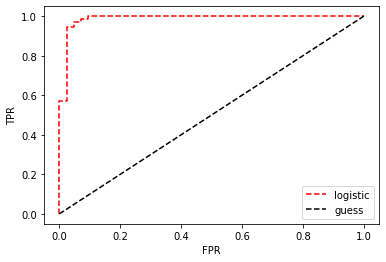

In [150]:
fpr, tpr, threasholds = metrics.roc_curve(y1_test, proba[:,1])
plt.plot( fpr, tpr, 'r--',label='logistic')
plt.plot( [0,1], [0,1], 'k--', label='guess')
plt.xlabel( 'FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [163]:
models = [('ada',AdaBoostClassifier()), 
          ('bc',BaggingClassifier()),
          ('logi',LogisticRegression()),
          ('tree',DecisionTreeClassifier()),
          ('knn',KNeighborsClassifier())
         ]

model_vote = VotingClassifier( models, voting = 'soft')
model_vote.fit( x1_train, y1_train )

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None)),
                             ('bc',
                              BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0,
                                                n_estimators=10, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                        

In [164]:
# 정확도
model_vote.score(x1_test, y1_test)

0.9473684210526315